___
# Ciência dos Dados - PROJETO 1

## Ester dos Santos Quintino
___

## Evolução na utilização de tecnologia por idosos
Relação entre o uso de tecnologia para acesso à internet, de idosos ao longo do tempo

___
## Introdução

Descreva aqui o que pretende analisar!

Capriche no português!! 
Se quiser pode utilizar pesquisas semelhantes publicadas em sites confiáveis!!


___
## Filtros da base de dados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Ester Quintino\Desktop\Projeto1CDDP


In [3]:
#Se usar o arquivo descompactado
#pd.read_csv('PES2015.csv',sep=',')

#Se usar o arquivo compactado como está no dropbox púbico
#pd.read_csv('PES2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')

# lendo a PNAD

In [4]:
dados=pd.read_csv('PES2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')
#dados.head()

In [5]:
dados_resumidos=dados.loc[:,["V0401","V061112","V061113","V061114","V4728","V9532","V8005","UF"]]#.dropna(axis=0)
dados_resumidos.head()

,V0401,V061112,V061113,V061114,V4728,V9532,V8005,UF
0,1,2.0,1.0,2.0,1,800.0,23,11
1,1,1.0,1.0,2.0,1,1150.0,23,11
2,1,1.0,1.0,2.0,1,880.0,35,11
3,2,1.0,1.0,2.0,1,3000.0,34,11
4,3,1.0,2.0,2.0,1,NaN,11,11


In [6]:
dados_não_nulos = dados_resumidos
#dados_não_nulos=dados_não_nulos.fillna(0)
dados_não_nulos.head()

,V0401,V061112,V061113,V061114,V4728,V9532,V8005,UF
0,1,2.0,1.0,2.0,1,800.0,23,11
1,1,1.0,1.0,2.0,1,1150.0,23,11
2,1,1.0,1.0,2.0,1,880.0,35,11
3,2,1.0,1.0,2.0,1,3000.0,34,11
4,3,1.0,2.0,2.0,1,NaN,11,11


# Renomeando Linhas e Colunas

In [7]:
dados_não_nulos.UF=dados.UF.astype('category')
dados_não_nulos.UF.cat.categories=(["Rondônia","Acre","Amazonas","Roraima","Pará","Amapá","Tocantins","Maranhão","Piauí","Ceará","Rio Grande do Norte","Paraíba","Pernambuco","Alagoas","Sergipe","Bahia","Minas Gerais","Espírito Santo","Rio de Janeiro","São Paulo","Paraná","Santa Catarina","Rio Grande do Sul","Mato Grosso do Sul","Mato Grosso","Goías","Distrito Federal"])
dados_não_nulos.loc[(dados_não_nulos.UF=="Rondônia")|(dados_não_nulos.UF=="Acre")|(dados_não_nulos.UF=="Amazonas")|
                    (dados_não_nulos.UF=="Roraima")|(dados_não_nulos.UF=="Pará")|(dados_não_nulos.UF=="Amapá")|
                    (dados_não_nulos.UF=="Tocantins")|(dados_não_nulos.UF=="Maranhão")|(dados_não_nulos.UF=="Piauí")|
                    (dados_não_nulos.UF=="Ceará")|(dados_não_nulos.UF=="Rio Grande do Norte")|(dados_não_nulos.UF=="Paraíba")|
                    (dados_não_nulos.UF=="Pernambuco")|(dados_não_nulos.UF=="Alagoas")|(dados_não_nulos.UF=="Sergipe")|
                    (dados_não_nulos.UF=="Bahia")|(dados_não_nulos.UF=="Minas Gerais")|(dados_não_nulos.UF=="Espírito Santo")|
                    (dados_não_nulos.UF=="Rio de Janeiro")|(dados_não_nulos.UF=="São Paulo")|(dados_não_nulos.UF=="Paraná")|
                    (dados_não_nulos.UF=="Santa Catarina")|(dados_não_nulos.UF=="Rio Grande do Sul")|
                    (dados_não_nulos.UF=="Mato Grosso do Sul")|(dados_não_nulos.UF=="Mato Grosso")|(dados_não_nulos.UF=="Goiás")|
                    (dados_não_nulos.UF=="Distrito Federal"),"Regiões"]="Brasil"
#dados_não_nulos=dados_não_nulos.dropna(axis=0) #Dropna:Eliminação dos NAN's.
dados_não_nulos = dados_não_nulos.drop(['Regiões'],axis=1)

dados_não_nulos.V4728=dados_não_nulos.V4728.astype('category')
#dados_não_nulos.V8005=dados_não_nulos.V8005.astype('int64')
#dados_não_nulos.V9532=dados_não_nulos.V9532.astype('int64')
dados_não_nulos.V4728.cat.categories = (["URBANA - Cidade ou vila, área urbanizada","URBANA - Cidade ou vila, área não urbanizada","URBANA - Área urbana isolada","RURAL - Aglomerado rural de extensão urbana ","RURAL - Aglomerado rural, isolado, povoado","RURAL - Aglomerado rural, isolado, núcleo","RURAL- Aglomerado rural, isolado, outros aglomerados", "RURAL - Zona rural exclusive aglomerado rural"])
dados_não_nulos.loc[(dados_não_nulos.UF=='Rondônia') | (dados_não_nulos.UF=='Acre') | (dados_não_nulos.UF=='Amazonas') | (dados_não_nulos.UF=='Roraima') | (dados_não_nulos.UF=='Pará') | (dados_não_nulos.UF=='Amapá') | (dados_não_nulos.UF=='Tocantins'),'Regiao'] = 'Norte'
dados_não_nulos.loc[(dados_não_nulos.UF=='Maranhão') | (dados_não_nulos.UF=='Piaui') | (dados_não_nulos.UF=='Caerá') | (dados_não_nulos.UF=='Rio Grande do Norte') | (dados_não_nulos.UF=='Paraíba') | (dados_não_nulos.UF=='Pernambuco') | (dados_não_nulos.UF=='Alagoas') | (dados_não_nulos.UF=='Sergipe') | (dados_não_nulos.UF=='Bahia'),'Regiao'] = 'Nordeste'
dados_não_nulos.loc[(dados_não_nulos.UF=='Minas Gerais') | (dados_não_nulos.UF=='Espirito Santo') | (dados_não_nulos.UF=='Rio de Janeiro') | (dados_não_nulos.UF=='São Paulo'),'Regiao'] = 'Sudeste'
dados_não_nulos.loc[(dados_não_nulos.UF=='Paraná') | (dados_não_nulos.UF=='Santa Catarina') | (dados_não_nulos.UF=='Rio Grande do Sul'),'Regiao'] = 'Sul'
dados_não_nulos.loc[(dados_não_nulos.UF=='Mato Grosso do Sul') | (dados_não_nulos.UF=='Mato Grosso') | (dados_não_nulos.UF=='Goiás') | (dados_não_nulos.UF=='Distrito Federal'),'Regiao'] = 'Centroeste'
dados_não_nulos.head()

dados_não_nulos.head()

,V0401,V061112,V061113,V061114,V4728,V9532,V8005,UF,Regiao
0,1,2.0,1.0,2.0,"URBANA - Cidade ou vila, área urbanizada",800.0,23,Rondônia,Norte
1,1,1.0,1.0,2.0,"URBANA - Cidade ou vila, área urbanizada",1150.0,23,Rondônia,Norte
2,1,1.0,1.0,2.0,"URBANA - Cidade ou vila, área urbanizada",880.0,35,Rondônia,Norte
3,2,1.0,1.0,2.0,"URBANA - Cidade ou vila, área urbanizada",3000.0,34,Rondônia,Norte
4,3,1.0,2.0,2.0,"URBANA - Cidade ou vila, área urbanizada",NaN,11,Rondônia,Norte


In [8]:
dados_não_nulos=dados_não_nulos.rename(columns={'UF':'UF','V8005':'Idade','V4728':'Condição_Censitária', 'V9532':'Renda',
                                                'V061112':'Acesso_a_net_microcomputador', 'V061113':'Acesso_a_net_celular',
                                                'V061114':'Acesso_a_net_tablet','V0401':'Condição_domiciliar'})
dados_não_nulos.loc[dados_não_nulos['Acesso_a_net_microcomputador'] == 1,'Acesso_a_net_microcomputador'] = 'Sim'
dados_não_nulos.loc[dados_não_nulos['Acesso_a_net_microcomputador'] == 2,'Acesso_a_net_microcomputador'] = 'Não'
#dados_não_nulos.loc[dados_não_nulos['Trabalho_Urbano'] == [] ,'Trabalho_Urbano'] = 'Não aplicável'

dados_não_nulos.loc[dados_não_nulos['Acesso_a_net_celular'] == 1,'Acesso_a_net_celular'] = 'Sim'
dados_não_nulos.loc[dados_não_nulos['Acesso_a_net_celular'] == 2,'Acesso_a_net_celular'] = 'Não'
#dados_não_nulos.loc[dados_não_nulos['Trabalho_Urbano'] == [] ,'Trabalho_Urbano'] = 'Não aplicável'

dados_não_nulos.loc[dados_não_nulos['Acesso_a_net_tablet'] == 1,'Acesso_a_net_tablet'] = 'Sim'
dados_não_nulos.loc[dados_não_nulos['Acesso_a_net_tablet'] == 2,'Acesso_a_net_tablet'] = 'Não'
#dados_não_nulos.loc[dados_não_nulos['Trabalho_Urbano'] == [] ,'Trabalho_Urbano'] = 'Não aplicável'

dados_não_nulos.loc[dados_não_nulos['Condição_domiciliar'] == 1,'Condição_domiciliar'] = 'Pessoa de referência'
dados_não_nulos.loc[dados_não_nulos['Condição_domiciliar'] == 2,'Condição_domiciliar'] = 'Cônjuge'
dados_não_nulos.loc[dados_não_nulos['Condição_domiciliar'] == 3,'Condição_domiciliar'] = 'Filho'
dados_não_nulos.loc[dados_não_nulos['Condição_domiciliar'] == 4,'Condição_domiciliar'] = 'Outro parente'
dados_não_nulos.loc[dados_não_nulos['Condição_domiciliar'] == 5,'Condição_domiciliar'] = 'Agregado'
dados_não_nulos.loc[dados_não_nulos['Condição_domiciliar'] == 6,'Condição_domiciliar'] = 'Pensionista'
dados_não_nulos.loc[dados_não_nulos['Condição_domiciliar'] == 7,'Condição_domiciliar'] = 'Empregado doméstico'
dados_não_nulos.loc[dados_não_nulos['Condição_domiciliar'] == 8,'Condição_domiciliar'] = 'Parente do empregado doméstico'


dados_não_nulos.head()

,Condição_domiciliar,Acesso_a_net_microcomputador,Acesso_a_net_celular,Acesso_a_net_tablet,Condição_Censitária,Renda,Idade,UF,Regiao
0,Pessoa de referência,Não,Sim,Não,"URBANA - Cidade ou vila, área urbanizada",800.0,23,Rondônia,Norte
1,Pessoa de referência,Sim,Sim,Não,"URBANA - Cidade ou vila, área urbanizada",1150.0,23,Rondônia,Norte
2,Pessoa de referência,Sim,Sim,Não,"URBANA - Cidade ou vila, área urbanizada",880.0,35,Rondônia,Norte
3,Cônjuge,Sim,Sim,Não,"URBANA - Cidade ou vila, área urbanizada",3000.0,34,Rondônia,Norte
4,Filho,Sim,Não,Não,"URBANA - Cidade ou vila, área urbanizada",NaN,11,Rondônia,Norte


In [9]:

dados_não_nulos=dados_não_nulos[dados_não_nulos['Renda']!=999999999999.0]
dados_não_nulos.head()

,Condição_domiciliar,Acesso_a_net_microcomputador,Acesso_a_net_celular,Acesso_a_net_tablet,Condição_Censitária,Renda,Idade,UF,Regiao
0,Pessoa de referência,Não,Sim,Não,"URBANA - Cidade ou vila, área urbanizada",800.0,23,Rondônia,Norte
1,Pessoa de referência,Sim,Sim,Não,"URBANA - Cidade ou vila, área urbanizada",1150.0,23,Rondônia,Norte
2,Pessoa de referência,Sim,Sim,Não,"URBANA - Cidade ou vila, área urbanizada",880.0,35,Rondônia,Norte
3,Cônjuge,Sim,Sim,Não,"URBANA - Cidade ou vila, área urbanizada",3000.0,34,Rondônia,Norte
4,Filho,Sim,Não,Não,"URBANA - Cidade ou vila, área urbanizada",NaN,11,Rondônia,Norte


In [10]:
dados_não_nulos = dados_não_nulos[(dados_não_nulos.Condição_domiciliar == 'Pessoa de referência')]
dados_não_nulos.head()

,Condição_domiciliar,Acesso_a_net_microcomputador,Acesso_a_net_celular,Acesso_a_net_tablet,Condição_Censitária,Renda,Idade,UF,Regiao
0,Pessoa de referência,Não,Sim,Não,"URBANA - Cidade ou vila, área urbanizada",800.0,23,Rondônia,Norte
1,Pessoa de referência,Sim,Sim,Não,"URBANA - Cidade ou vila, área urbanizada",1150.0,23,Rondônia,Norte
2,Pessoa de referência,Sim,Sim,Não,"URBANA - Cidade ou vila, área urbanizada",880.0,35,Rondônia,Norte
8,Pessoa de referência,NaN,NaN,NaN,"URBANA - Cidade ou vila, área urbanizada",3500.0,46,Rondônia,Norte
10,Pessoa de referência,Sim,Não,Não,"URBANA - Cidade ou vila, área urbanizada",NaN,71,Rondônia,Norte


In [11]:
dados_não_nulos = dados_não_nulos[(dados_não_nulos.Idade >= 60)]
dados_não_nulos.head()

,Condição_domiciliar,Acesso_a_net_microcomputador,Acesso_a_net_celular,Acesso_a_net_tablet,Condição_Censitária,Renda,Idade,UF,Regiao
10,Pessoa de referência,Sim,Não,Não,"URBANA - Cidade ou vila, área urbanizada",NaN,71,Rondônia,Norte
24,Pessoa de referência,Sim,Sim,Não,"URBANA - Cidade ou vila, área urbanizada",1700.0,60,Rondônia,Norte
61,Pessoa de referência,NaN,NaN,NaN,"URBANA - Cidade ou vila, área urbanizada",1150.0,62,Rondônia,Norte
65,Pessoa de referência,NaN,NaN,NaN,"URBANA - Cidade ou vila, área urbanizada",3030.0,69,Rondônia,Norte
107,Pessoa de referência,Sim,Sim,Não,"URBANA - Cidade ou vila, área urbanizada",1700.0,65,Rondônia,Norte


In [12]:
# Tabelas univariada


# Tabelas univariada
print('Frequências absolutas por Condição_domiciliar:')
ut1 = dados_não_nulos.Condição_domiciliar.value_counts(sort=False).reindex(['Pessoa de referência'])
print(ut1,'\n')

# Tabelas univariada
print('Frequências absolutas por Acesso à internet pelo microcomputador:')
ut2 = dados_não_nulos.Acesso_a_net_microcomputador.value_counts(sort=False).reindex(['Não', 'Sim'])
print(ut2,'\n')

# Tabelas univariada
print('Frequências absolutas por Acesso à internet pelo celular:')
ut3 = dados_não_nulos.Acesso_a_net_celular.value_counts(sort=False).reindex(['Não', 'Sim'])
print(ut3,'\n')

# Tabelas univariada
print('Frequências absolutas por Acesso à internet pelo tablet:')
ut4 = dados_não_nulos.Acesso_a_net_tablet.value_counts(sort=False).reindex(['Não', 'Sim'])
print(ut4,'\n')

# Tabelas univariada
print('Frequências absolutas por UF:')
ut5 = dados_não_nulos.UF.value_counts(sort=False).reindex(['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Para', 'Amapá', 'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia', 'Minas Gerais', 'Espírito Santos', 'São Paulo', 'Paraná', 'Santa Catarina', 'Rio Grande do Sul', 'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal'])
print(ut5,'\n')

Frequências absolutas por Condição_domiciliar:
Pessoa de referência    31236
Name: Condição_domiciliar, dtype: int64 

Frequências absolutas por Acesso à internet pelo microcomputador:
Não    1119
Sim    4727
Name: Acesso_a_net_microcomputador, dtype: int64 

Frequências absolutas por Acesso à internet pelo celular:
Não    1974
Sim    3872
Name: Acesso_a_net_celular, dtype: int64 

Frequências absolutas por Acesso à internet pelo tablet:
Não    4898
Sim     948
Name: Acesso_a_net_tablet, dtype: int64 

Frequências absolutas por UF:
Rondônia                434.0
Acre                    266.0
Amazonas                658.0
Roraima                 130.0
Para                      NaN
Amapá                   143.0
Tocantins               503.0
Maranhão                652.0
Piauí                   438.0
Ceará                  1534.0
Rio Grande do Norte     378.0
Paraíba                 504.0
Pernambuco             2040.0
Alagoas                 452.0
Sergipe                 490.0
Bahia       

___
## Análise e Resultados

# Gráfico que relaciona: Condição Domiciliar com o Acesso à Internet através de microcomputador

In [13]:
ct=pd.crosstab(dados_não_nulos.Acesso_a_net_microcomputador, dados_não_nulos.Condição_domiciliar, margins=True, rownames=['Acesso_a_net_microcomputador'])
ct = ct.drop(['All'],axis = 1)
ct = ct.drop(['All'])
ct


Condição_domiciliar,Pessoa de referência
Acesso_a_net_microcomputador,
Não,1119
Sim,4727


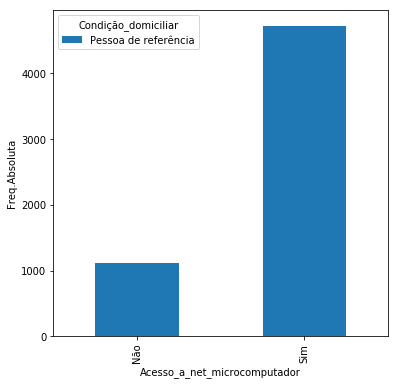

In [14]:
plot = ct.plot(kind='bar',figsize=(6, 6))
plt.ylabel('Freq.Absoluta')
plt.show()

# Gráfico que relaciona: Condição Domiciliar com o Acesso à Internet através de Telefone Celular

In [26]:
ct1=pd.crosstab(dados_não_nulos.Acesso_a_net_celular, dados_não_nulos.Condição_domiciliar, margins=True, rownames=['Acesso_a_net_celular'])
ct1 = ct1.drop(['All'],axis = 1)
ct1 = ct1.drop(['All'])
ct1

Condição_domiciliar,Pessoa de referência
Acesso_a_net_celular,
Não,1974
Sim,3872


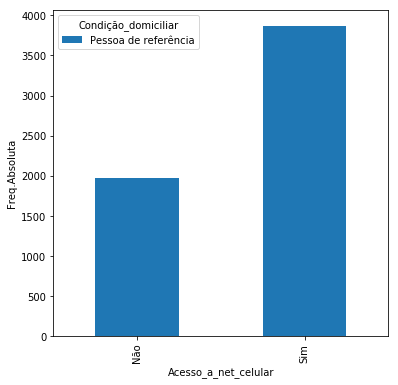

In [27]:
plot = ct1.plot(kind='bar',figsize=(6, 6))
plt.ylabel('Freq.Absoluta')
plt.show()

# Gráfico que relaciona: Condição Domiciliar com o Acesso à Internet através do Tablet

In [28]:
ct2=pd.crosstab(dados_não_nulos.Acesso_a_net_tablet, dados_não_nulos.Condição_domiciliar, margins=True, rownames=['Acesso_a_net_tablet'])
ct2 = ct2.drop(['All'],axis = 1)
ct2 = ct2.drop(['All'])
ct2

Condição_domiciliar,Pessoa de referência
Acesso_a_net_tablet,
Não,4898
Sim,948


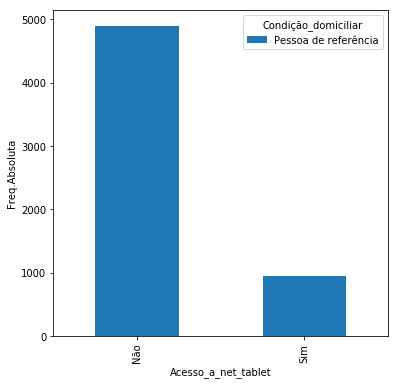

In [29]:
plot = ct2.plot(kind='bar',figsize=(6, 6))
plt.ylabel('Freq.Absoluta')
plt.show()

# Gráfico que relaciona: Condição Domiciliar com Renda

In [19]:
renda=dados_não_nulos[['Renda','Condição_domiciliar']].copy()
renda.head()

,Renda,Condição_domiciliar
10,NaN,Pessoa de referência
24,1700.0,Pessoa de referência
61,1150.0,Pessoa de referência
65,3030.0,Pessoa de referência
107,1700.0,Pessoa de referência


In [20]:
faixa=np.arange(0,5000,100)
faixa

array([   0,  100,  200,  300,  400,  500,  600,  700,  800,  900, 1000,
       1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100,
       2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200,
       3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300,
       4400, 4500, 4600, 4700, 4800, 4900])

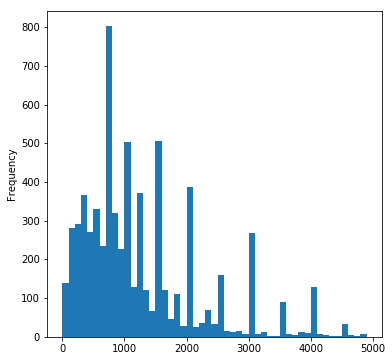

In [21]:
plot = renda.Renda.plot.hist(bins=faixa, figsize=(6,6), alpha=1)
plt.show()

In [22]:
renda = dados_não_nulos.Renda
renda.describe()

count      7448.000000
mean       2309.170650
std        5236.202822
min           8.000000
25%         600.000000
50%        1000.000000
75%        2000.000000
max      200000.000000
Name: Renda, dtype: float64

In [23]:
faixa = (0,937/4 ,937/2, 937, 937*2,2771.5)
rendarelativa = pd.cut(renda, faixa, False)
print('Frequências relativas:')
ut6 = (rendarelativa.value_counts(sort=False, normalize=True)*100).round(decimals=1)
print(ut6,'\n')

Frequências relativas:
[0.0, 234.25)       10.2
[234.25, 468.5)     12.0
[468.5, 937.0)      31.3
[937.0, 1874.0)     33.7
[1874.0, 2771.5)    12.8
Name: Renda, dtype: float64 



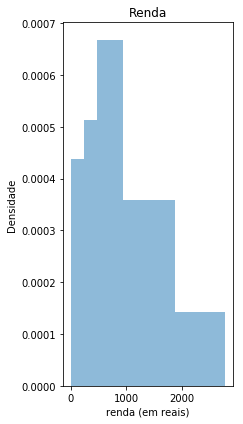

In [32]:
fig = plt.figure(figsize=(11, 5))
plt.subplot(121)
plot = renda.plot.hist(bins=faixa,title='Renda', figsize=(6, 6), normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('renda (em reais)')

plt.tight_layout()
plt.show()

# Gráfico que relaciona: Região com Renda

In [33]:
#Relação Renda Percapita Domiciliar e Região
renda_região=pd.crosstab( rendarelativa, dados_não_nulos.Regiao, margins=True, rownames=['Renda'], colnames=['Região'], normalize=True)*100
renda_região=renda_região.round(decimals=1)
renda_região

Região,Centroeste,Nordeste,Norte,Sudeste,Sul,All
Renda,,,,,,
"[0.0, 234.25)",0.3,4.4,1.8,1.9,1.2,9.5
"[234.25, 468.5)",0.7,3.9,2.5,3.0,1.9,12.1
"[468.5, 937.0)",1.7,7.0,6.0,10.7,5.5,30.9
"[937.0, 1874.0)",2.4,4.8,4.4,14.7,8.1,34.4
"[1874.0, 2771.5)",0.9,1.9,1.6,5.5,3.3,13.1
All,6.0,22.0,16.3,35.7,20.0,100.0


Text(0,0.5,'Freq.Relativa (em %)')

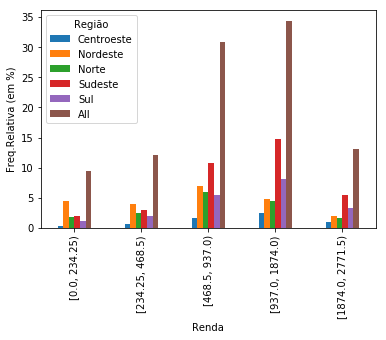

In [34]:
plot = renda_região[:-1].plot(kind='bar')
plt.ylabel('Freq.Relativa (em %)')

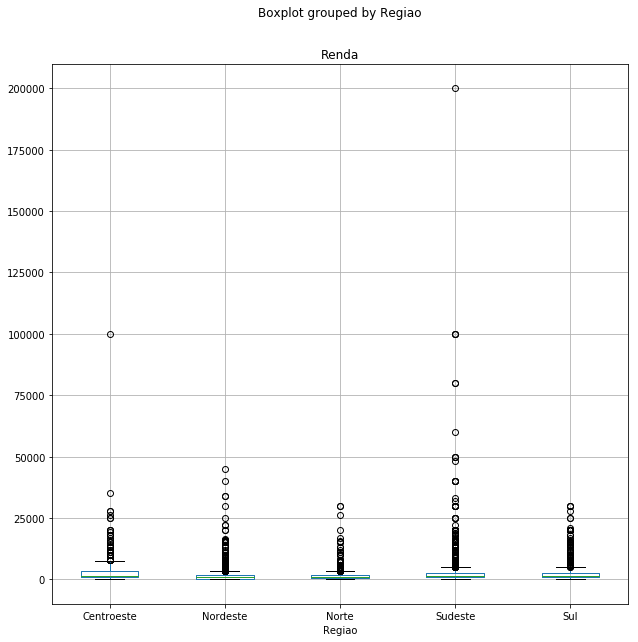

In [36]:
dados_não_nulos.boxplot(column="Renda",  by="Regiao", figsize=(10,10))

# Relação Acesso à Internet feita através de microcomputador e Região

In [37]:
regiaointernet_microcomputador=pd.crosstab( dados_não_nulos.Acesso_a_net_microcomputador,dados_não_nulos.Regiao, margins=True, rownames=['Acesso à Internet feita através de microcomputador'], colnames=['Região'], normalize=True)*100
regiaointernet_microcomputador=regiaointernet_microcomputador.round(decimals=1)
regiaointernet_microcomputador

Região,Centroeste,Nordeste,Norte,Sudeste,Sul,All
Acesso à Internet feita através de microcomputador,,,,,,
Não,1.4,3.7,3.1,7.1,3.5,18.7
Sim,6.5,12.6,4.6,38.2,19.4,81.3
All,7.9,16.3,7.7,45.3,22.9,100.0


Text(0,0.5,'Freq.Relativa (em %)')

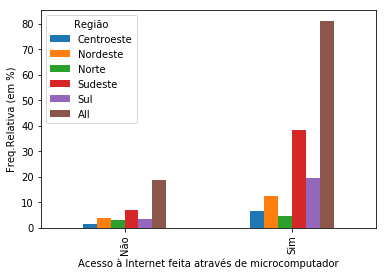

In [43]:
plot = regiaointernet_microcomputador[:-1].plot(kind='bar')
plt.ylabel('Freq.Relativa (em %)')

# Relação Acesso à Internet feita através de telefone celular e Região

In [39]:
regiaointernet_celular=pd.crosstab( dados_não_nulos.Acesso_a_net_celular,dados_não_nulos.Regiao, margins=True, rownames=['Acesso à Internet feita através de telefone celular'], colnames=['Região'], normalize=True)*100
regiaointernet_celular=regiaointernet_celular.round(decimals=1)
regiaointernet_celular

Região,Centroeste,Nordeste,Norte,Sudeste,Sul,All
Acesso à Internet feita através de telefone celular,,,,,,
Não,1.6,4.5,1.8,16.6,9.6,34.2
Sim,6.3,11.8,5.9,28.6,13.3,65.8
All,7.9,16.3,7.7,45.3,22.9,100.0


Text(0,0.5,'Freq.Relativa (em %)')

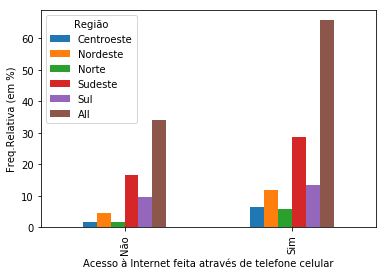

In [45]:
plot = regiaointernet_celular[:-1].plot(kind='bar')
plt.ylabel('Freq.Relativa (em %)')

# Relação Acesso à Internet feita através de tablet e Região

In [42]:
regiaointernet_tablet=pd.crosstab( dados_não_nulos.Acesso_a_net_tablet,dados_não_nulos.Regiao, margins=True, rownames=['Acesso à Internet feita através de tablet'], colnames=['Região'], normalize=True)*100
regiaointernet_tablet=regiaointernet_tablet.round(decimals=1)
regiaointernet_tablet

Região,Centroeste,Nordeste,Norte,Sudeste,Sul,All
Acesso à Internet feita através de tablet,,,,,,
Não,6.3,13.7,6.9,37.7,19.0,83.6
Sim,1.6,2.6,0.8,7.6,3.9,16.4
All,7.9,16.3,7.7,45.3,22.9,100.0


Text(0,0.5,'Freq.Relativa (em %)')

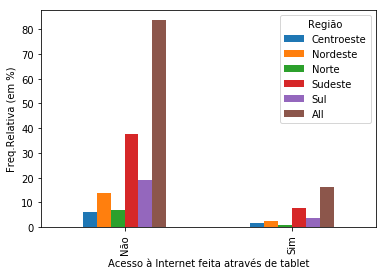

In [46]:
plot = regiaointernet_tablet[:-1].plot(kind='bar')
plt.ylabel('Freq.Relativa (em %)')

# Relação da Região (UF) com o Código de Situação Censitária

In [48]:
dados_não_nulos.loc[(dados_não_nulos.UF=='Norte') | (dados_não_nulos.Condição_Censitária=="URBANA - Cidade ou vila, área urbanizada"), 'RegiãoCondiçãoCensitária'] = 'Urbana'
dados_não_nulos.loc[(dados_não_nulos.UF=='Nordeste') | (dados_não_nulos.Condição_Censitária=="URBANA - Cidade ou vila, área urbanizada"), 'RegiãoCondiçãoCensitária'] = 'Urbana'
dados_não_nulos.loc[(dados_não_nulos.UF=='Sul') | (dados_não_nulos.Condição_Censitária=="URBANA - Cidade ou vila, área urbanizada"), 'RegiãoCondiçãoCensitária'] = 'Urbana'
dados_não_nulos.loc[(dados_não_nulos.UF=='Sudeste') | (dados_não_nulos.Condição_Censitária=="URBANA - Cidade ou vila, área urbanizada"), 'RegiãoCondiçãoCensitária'] = 'Urbana'
dados_não_nulos.loc[(dados_não_nulos.UF=='Centroeste') | (dados_não_nulos.Condição_Censitária=="URBANA - Cidade ou vila, área urbanizada"), 'RegiãoCondiçãoCensitária'] = 'Urbana'


dados_não_nulos.loc[(dados_não_nulos.UF=='Norte') | (dados_não_nulos.Condição_Censitária=="URBANA - Cidade ou vila, área não urbanizada"), 'RegiãoCondiçãoCensitária'] = 'Urbana'
dados_não_nulos.loc[(dados_não_nulos.UF=='Nordeste') | (dados_não_nulos.Condição_Censitária=="URBANA - Cidade ou vila, área não urbanizada"), 'RegiãoCondiçãoCensitária'] = 'Urbana'
dados_não_nulos.loc[(dados_não_nulos.UF=='Sul') | (dados_não_nulos.Condição_Censitária=="URBANA - Cidade ou vila, área não urbanizada"), 'RegiãoCondiçãoCensitária'] = 'Urbana'
dados_não_nulos.loc[(dados_não_nulos.UF=='Sudeste') | (dados_não_nulos.Condição_Censitária=="URBANA - Cidade ou vila, área não urbanizada"), 'RegiãoCondiçãoCensitária'] = 'Urbana'
dados_não_nulos.loc[(dados_não_nulos.UF=='Centroeste') | (dados_não_nulos.Condição_Censitária=="URBANA - Cidade ou vila, área não urbanizada"), 'RegiãoCondiçãoCensitária'] = 'Urbana'


dados_não_nulos.loc[(dados_não_nulos.UF=='Norte') | (dados_não_nulos.Condição_Censitária=="URBANA - Área urbana isolada"), 'RegiãoCondiçãoCensitária'] = 'Urbana'
dados_não_nulos.loc[(dados_não_nulos.UF=='Nordeste') | (dados_não_nulos.Condição_Censitária=="URBANA - Área urbana isolada"), 'RegiãoCondiçãoCensitária'] =  'Urbana'
dados_não_nulos.loc[(dados_não_nulos.UF=='Sul') | (dados_não_nulos.Condição_Censitária=="URBANA - Área urbana isolada"), 'RegiãoCondiçãoCensitária'] = 'Urbana'
dados_não_nulos.loc[(dados_não_nulos.UF=='Sudeste') | (dados_não_nulos.Condição_Censitária=="URBANA - Área urbana isolada"), 'RegiãoCondiçãoCensitária'] = 'Urbana'
dados_não_nulos.loc[(dados_não_nulos.UF=='Centroeste') | (dados_não_nulos.Condição_Censitária=="URBANA - Área urbana isolada"), 'RegiãoCondiçãoCensitária'] = 'Urbana'


dados_não_nulos.loc[(dados_não_nulos.UF=='Norte') | (dados_não_nulos.Condição_Censitária=="RURAL - Aglomerado rural de extensão urbana "), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Nordeste') | (dados_não_nulos.Condição_Censitária=="RURAL - Aglomerado rural de extensão urbana "), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Sul') | (dados_não_nulos.Condição_Censitária=="RURAL - Aglomerado rural de extensão urbana "), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Sudeste') | (dados_não_nulos.Condição_Censitária=="RURAL - Aglomerado rural de extensão urbana "), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Centroeste') | (dados_não_nulos.Condição_Censitária=="RURAL - Aglomerado rural de extensão urbana "), 'RegiãoCondiçãoCensitária'] = 'Rural'

dados_não_nulos.loc[(dados_não_nulos.UF=='Norte') | (dados_não_nulos.Condição_Censitária=="RURAL - Aglomerado rural, isolado, povoado"), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Nordeste') | (dados_não_nulos.Condição_Censitária=="RURAL - Aglomerado rural, isolado, povoado"), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Sul') | (dados_não_nulos.Condição_Censitária=="RURAL - Aglomerado rural, isolado, povoado"), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Sudeste') | (dados_não_nulos.Condição_Censitária=="RURAL - Aglomerado rural, isolado, povoado"), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Centroeste') | (dados_não_nulos.Condição_Censitária=="RURAL - Aglomerado rural, isolado, povoado"), 'RegiãoCondiçãoCensitária'] = 'Rural'

dados_não_nulos.loc[(dados_não_nulos.UF=='Norte') | (dados_não_nulos.Condição_Censitária=="RURAL - Aglomerado rural, isolado, núcleo"), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Nordeste') | (dados_não_nulos.Condição_Censitária=="RURAL - Aglomerado rural, isolado, núcleo"), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Sul') | (dados_não_nulos.Condição_Censitária=="RURAL - Aglomerado rural, isolado, núcleo"), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Sudeste') | (dados_não_nulos.Condição_Censitária=="RURAL - Aglomerado rural, isolado, núcleo"), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Centroeste') | (dados_não_nulos.Condição_Censitária=="RURAL - Aglomerado rural, isolado, núcleo"), 'RegiãoCondiçãoCensitária'] = 'Rural'

dados_não_nulos.loc[(dados_não_nulos.UF=='Norte') | (dados_não_nulos.Condição_Censitária=="RURAL- Aglomerado rural, isolado, outros aglomerados"), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Nordeste') | (dados_não_nulos.Condição_Censitária=="RURAL- Aglomerado rural, isolado', outros aglomerados"), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Sul') | (dados_não_nulos.Condição_Censitária=="RURAL- Aglomerado rural, isolado, outros aglomerados"), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Sudeste') | (dados_não_nulos.Condição_Censitária=="RURAL- Aglomerado rural, isolado, outros aglomerados"), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Centroeste') | (dados_não_nulos.Condição_Censitária=="RURAL- Aglomerado rural, isolado, outros aglomerados"), 'RegiãoCondiçãoCensitária'] = 'Rural'

dados_não_nulos.loc[(dados_não_nulos.UF=='Norte') | (dados_não_nulos.Condição_Censitária=="RURAL - Zona rural exclusive aglomerado rural"), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Nordeste') | (dados_não_nulos.Condição_Censitária=="RURAL - Zona rural exclusive aglomerado rural"), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Sul') | (dados_não_nulos.Condição_Censitária=="RURAL - Zona rural exclusive aglomerado rural"), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Sudeste') | (dados_não_nulos.Condição_Censitária=="RURAL - Zona rural exclusive aglomerado rural"), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Centroeste') | (dados_não_nulos.Condição_Censitária=="RURAL - Zona rural exclusive aglomerado rural"), 'RegiãoCondiçãoCensitária'] = 'Rural'

dados_não_nulos.head()

,Condição_domiciliar,Acesso_a_net_microcomputador,Acesso_a_net_celular,Acesso_a_net_tablet,Condição_Censitária,Renda,Idade,UF,Regiao,RegiãoCondiçãoCensitária
10,Pessoa de referência,Sim,Não,Não,"URBANA - Cidade ou vila, área urbanizada",NaN,71,Rondônia,Norte,Urbana
24,Pessoa de referência,Sim,Sim,Não,"URBANA - Cidade ou vila, área urbanizada",1700.0,60,Rondônia,Norte,Urbana
61,Pessoa de referência,NaN,NaN,NaN,"URBANA - Cidade ou vila, área urbanizada",1150.0,62,Rondônia,Norte,Urbana
65,Pessoa de referência,NaN,NaN,NaN,"URBANA - Cidade ou vila, área urbanizada",3030.0,69,Rondônia,Norte,Urbana
107,Pessoa de referência,Sim,Sim,Não,"URBANA - Cidade ou vila, área urbanizada",1700.0,65,Rondônia,Norte,Urbana


# GRÁFICO QUE RELACIONA O CÓDIGO DE SITUAÇÃO CENSITÁRIA E REGIÃO

Text(0.5,1,'Relação do Código de Situação Censitária e Região')

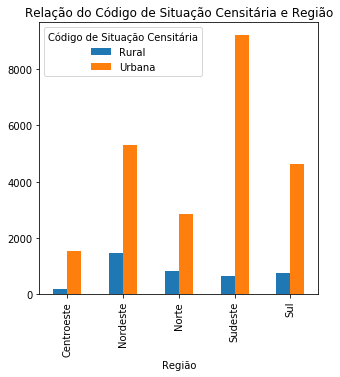

In [49]:
situ_região=pd.crosstab(dados_não_nulos.Regiao,dados_não_nulos.RegiãoCondiçãoCensitária,rownames=['Região'],colnames=['Código de Situação Censitária'])
plot=situ_região.plot(kind='bar',figsize=(5,5),legend=True)
plt.title('Relação do Código de Situação Censitária e Região')

# Relação entre Condição Censitária e Renda

In [53]:
renda_região=pd.crosstab( rendarelativa, dados_não_nulos.RegiãoCondiçãoCensitária, margins=True, rownames=['Renda'], colnames=['Região'], normalize=True)*100
renda_região=renda_região.round(decimals=1)
renda_região=
renda_região

Região,Rural,Urbana,All
Renda,,,
"[0.0, 234.25)",3.6,6.6,10.2
"[234.25, 468.5)",3.7,8.3,12.0
"[468.5, 937.0)",5.8,25.5,31.3
"[937.0, 1874.0)",4.3,29.3,33.7
"[1874.0, 2771.5)",1.3,11.4,12.8
All,18.8,81.2,100.0


Text(0,0.5,'Freq.Relativa (em %)')

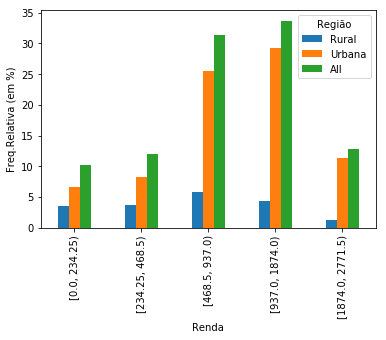

In [54]:

plot = renda_região[:-1].plot(kind='bar')
plt.ylabel('Freq.Relativa (em %)')

___
## Conclusão 

Descreva aqui suas conclusões!